# HOS-Y1 simulations

In [1]:
cd ~/HOS-Y1-prep/hoscodes/

/global/u2/j/jatorres/HOS-Y1-prep/hoscodes


In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import os
#from HOScodes import *
from itertools import combinations_with_replacement
from glob import glob

In [3]:
plt.style.use('~/plots/presentation.mplstyle') #only to load mpl style params #Fix latex compiler

## Theory measurements

In [4]:
#Bins for map2 and map3
bins=np.linspace(-0.1-0.001,0.1+0.001,201) 
binmids_kappacounts=(bins[1:]+bins[:-1])/2
ell_map2_bins = np.arange(0,5001,1)
theta_tr = combinations_with_replacement([4,8,16,32],3)
theta_tr_map3_bins = list(theta_tr)
theta_tr_map3_bins
theta_format = [ '{0}\' {1}\' {2}\' '.format(*tr) for tr in theta_tr_map3_bins ]

In [80]:
ell_theory = np.loadtxt('../map2alm/theory/ell.txt')
map2alm_theory = []
map3_theory = []
PDF_theory = []
#PDF_theory2 = []
Nzbins = 5
for i in range(Nzbins):
    map2alm_theory.append(np.loadtxt('../map2alm/theory/bin_%d_%d.txt'%(i+1,i+1)))
    map3_theory.append(np.loadtxt('../Map3/TheoryPredictions/Map3_theo_tomo_%d.dat'%i))
    PDF_theory.append(np.loadtxt('../PDF_Peaks_Minima/Theory_PDF_SkySim5000/kappa_PDF_DESC_LSST_theta_10.25_arcmin_bin%d.dat'%(i)))

In [8]:
from scipy.interpolate import interp1d

In [9]:
Cl_ell_interp = []
for i in range(5):
    Cl_ell_interp.append(interp1d(ell_theory,map2alm_theory[i]))


## HACC-Y1 simulation

## Load results

In [ ]:
maps_names = ''

In [76]:
def load_hos(maps_names):
    HOS = []
    for i in range(5):
        HOS.append(np.loadtxt(maps_names[i]))
    return HOS

In [15]:


map2_path_nzshells26_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells26_seed0_*'))
map2_path_nzshells26_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells26_seed1_*'))
map2_path_nzshells34_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells34_seed0_*'))
map2_path_nzshells34_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells34_seed1_*'))
#map2_path_nzshells51_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells51_seed0_*'))
#map2_path_nzshells51_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells51_seed1_*'))
map2_path_nzshells101_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells101_seed0_*'))
map2_path_nzshells101_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells101_seed1_*'))




In [51]:
map3_path_nzshells26_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map3/kappa_nzshells26_seed0_*'))
map3_path_nzshells26_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map3/kappa_nzshells26_seed1_*'))
map3_path_nzshells34_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map3/kappa_nzshells34_seed0_*'))
map3_path_nzshells34_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map3/kappa_nzshells34_seed1_*'))
#map2_path_nzshells51_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells51_seed0_*'))
#map2_path_nzshells51_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells51_seed1_*'))
map3_path_nzshells101_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map3/kappa_nzshells101_seed0_*'))
map3_path_nzshells101_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map3/kappa_nzshells101_seed1_*'))

map3_nzshells26_seed0 = load_hos(map3_path_nzshells26_seed0)
map3_nzshells26_seed1 = load_hos(map3_path_nzshells26_seed1)
map3_nzshells34_seed0 = load_hos(map3_path_nzshells34_seed0)
#map2_nzshells34_seed1 = load_hos(map2_path_nzshells34_seed1)
#maph_nzshells51_seed0 = load_hos(#)
#maph_nzshells51_seed1 = load_hos(#)
map3_nzshells101_seed0 = load_hos(map3_path_nzshells101_seed0)
map3_nzshells101_seed1 = load_hos(map3_path_nzshells101_seed1)

### Re-binning data Map2

In [26]:
ell_rb = ell_map2_bins[50:-1].reshape(99,50).mean(axis=1)

## Map2alm

In [41]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)}

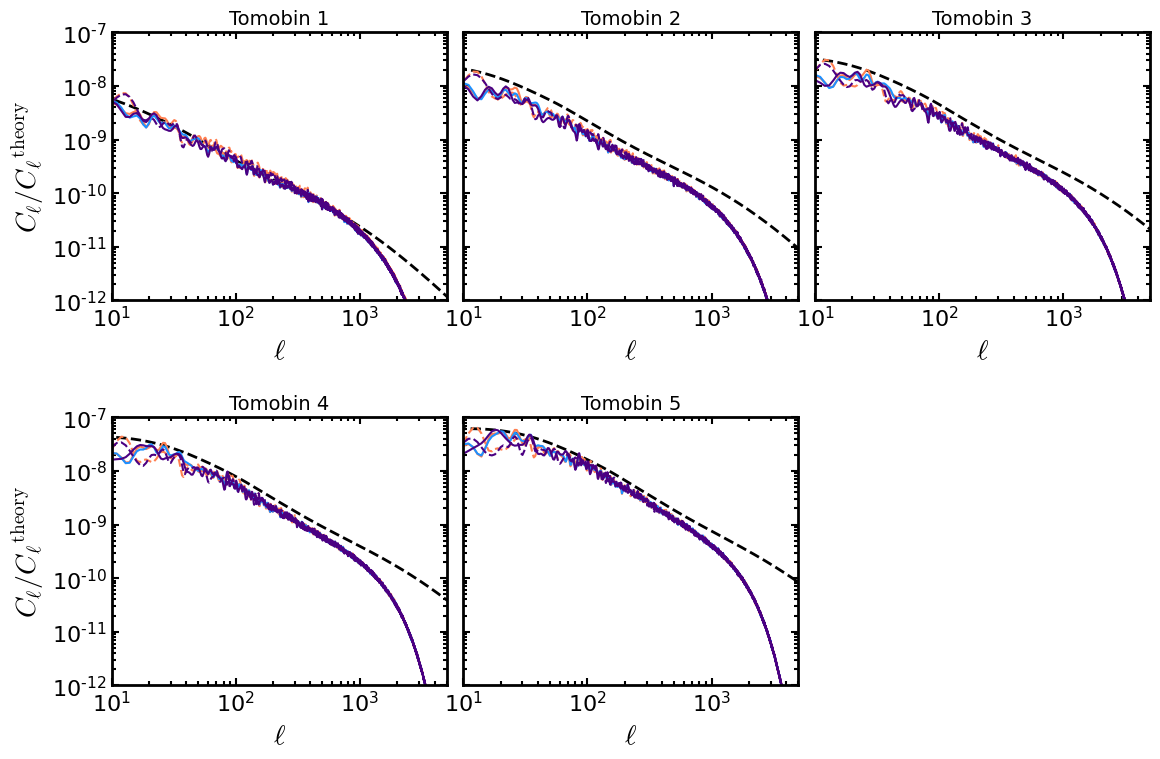

In [50]:
f,ax = plt.subplots(2,3,figsize=(12,8),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$C_\ell / C{_\ell}^{{\rm theory}}$')
ax[ax_d['3']].set_ylabel(r'$C_\ell / C{_\ell}^{{\rm theory}}$')

for i in range(5):
    l1, = ax[ax_d['%d'%i]].plot(ell_theory,map2alm_theory[i],'k',ls='--',lw=2)
    l2_1 = ax[ax_d['%d'%i]].plot(ell_map2_bins,map2_nzshells26_seed0[i],color='coral')
    l2_2 = ax[ax_d['%d'%i]].plot(ell_map2_bins,map2_nzshells26_seed1[i],color='coral',ls='--')
    l3_1 = ax[ax_d['%d'%i]].plot(ell_map2_bins,map2_nzshells34_seed0[i],color='dodgerblue')
    l4_1 = ax[ax_d['%d'%i]].plot(ell_map2_bins,map2_nzshells101_seed0[i],color='indigo')
    l4_2 = ax[ax_d['%d'%i]].plot(ell_map2_bins,map2_nzshells101_seed1[i],color='indigo',ls='--')

    #l3 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells19_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells19_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='indigo')
    #l4 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells106_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells106_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='dodgerblue')
    ax[ax_d['%d'%i]].set_xlabel(r'$\ell$')
    ax[ax_d['%d'%i]].set_xscale('log')
    ax[ax_d['%d'%i]].set_yscale('log')
    ax[ax_d['%d'%i]].set_xlim(11e0,5e3)
    ax[ax_d['%d'%i]].set_xticks([1e1,1e2,1e3])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
#ax[1,1].legend([l2,l3],
#               [r'$N_{\rm shells} = 19$',
                #r'$N_{\rm shells} = 106$',
#                r'$N_{\rm shells} = 50$'],
#               loc=1,
#               bbox_to_anchor=(1.8,1.0))
ax[0,0].set_ylim(1e-12,1e-7)
#ax[0,0].set_yscale('log')
f.delaxes(ax[1,2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.05,)
#plt.savefig('imgs/DESC_meeting/map2alm_Nshells_50_19_50ellbins.jpg',bbox_inches='tight')

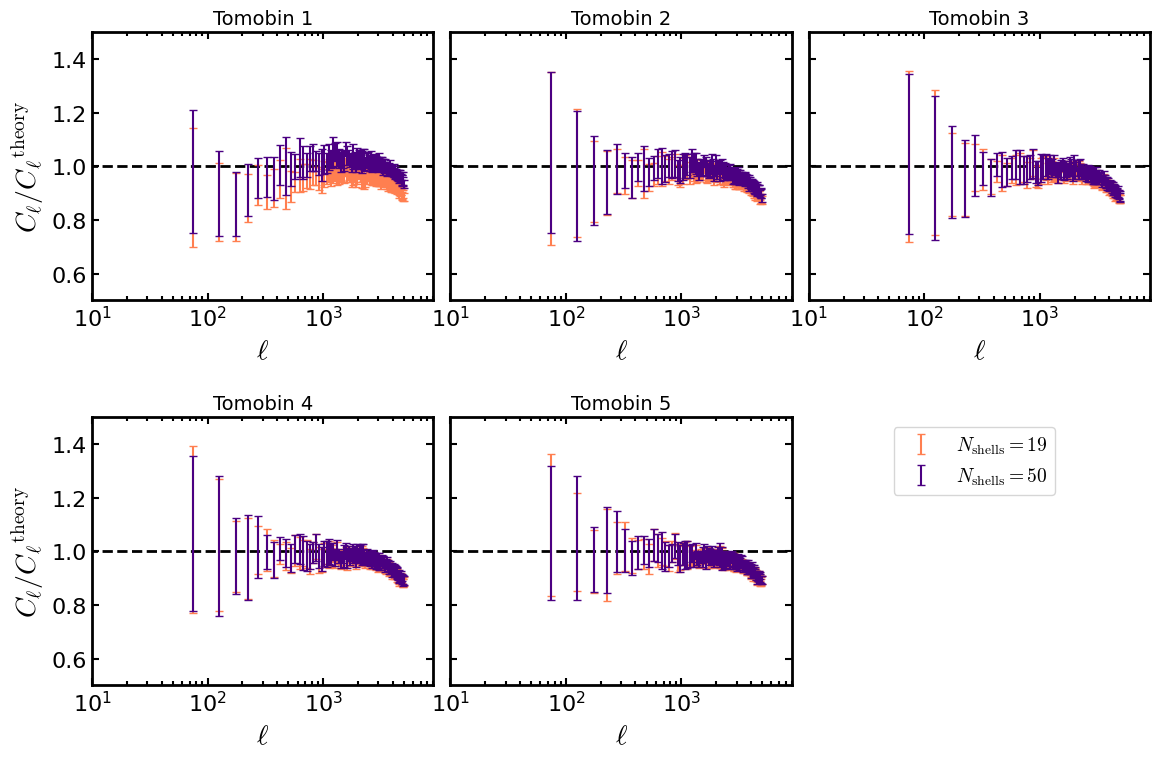

In [13]:
f,ax = plt.subplots(2,3,figsize=(12,8),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$C_\ell / C{_\ell}^{{\rm theory}}$')
ax[ax_d['3']].set_ylabel(r'$C_\ell / C{_\ell}^{{\rm theory}}$')

for i in range(5):
    l1, = ax[ax_d['%d'%i]].plot(ell_theory,np.ones_like(map2alm_theory[i]),'k',ls='--',lw=2)
    #l2 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells50_rb[i],yerr=map2_nshells50_rb_std[i],fmt='k.')
    #l3 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells19_rb[i],yerr=map2_nshells50_rb_std[i],fmt='b.')
    #l4 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells106_rb[i],yerr=map2_nshells50_rb_std[i],fmt='r.')
    l2 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells50_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells50_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='coral')
    l3 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells19_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells19_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='indigo')
    #l4 = ax[ax_d['%d'%i]].errorbar(ell_rb,map2_nshells106_rb[i]/Cl_ell_interp[i](ell_rb),yerr=map2_nshells106_rb_std[i]/Cl_ell_interp[i](ell_rb),fmt=' ',color='dodgerblue')
    ax[ax_d['%d'%i]].set_xlabel(r'$\ell$')
    ax[ax_d['%d'%i]].set_xscale('log')
    ax[ax_d['%d'%i]].set_xlim(11e0,9e3)
    ax[ax_d['%d'%i]].set_xticks([1e1,1e2,1e3])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
ax[1,1].legend([l2,l3],
               [r'$N_{\rm shells} = 19$',
                #r'$N_{\rm shells} = 106$',
                r'$N_{\rm shells} = 50$'],
               loc=1,
               bbox_to_anchor=(1.8,1.0))
ax[0,0].set_ylim(0.5,1.5)
#ax[0,0].set_yscale('log')
f.delaxes(ax[1,2])
plt.tight_layout()
plt.subplots_adjust(wspace=0.05,)
plt.savefig('imgs/DESC_meeting/map2alm_Nshells_50_19_50ellbins.jpg',bbox_inches='tight')

## $M_{\rm ap}^3$

In [62]:
map3_nzshells101_seed0

[array([-8.71541981e-11, -6.99934002e-11, -3.64941033e-11, -1.51063812e-11,
        -5.75507938e-11, -2.91442701e-11, -1.18927056e-11, -1.19380137e-11,
        -4.10409287e-12, -1.00031761e-12, -6.53782002e-11, -4.03083672e-11,
        -1.81000310e-11, -2.47142616e-11, -1.04079549e-11, -3.23639460e-12,
        -2.26870458e-11, -1.21519477e-11, -6.33951869e-12, -5.61914158e-12]),
 array([-3.13212393e-10, -2.37540381e-10, -1.19174990e-10, -5.13985005e-11,
        -1.82852768e-10, -8.79633704e-11, -3.67854539e-11, -3.29494751e-11,
        -1.12332492e-11, -2.64688284e-12, -1.96209634e-10, -1.15672845e-10,
        -5.30311995e-11, -6.65862006e-11, -2.80727058e-11, -8.53684748e-12,
        -5.90994020e-11, -3.19235268e-11, -1.65451648e-11, -1.45458398e-11]),
 array([-6.46534367e-10, -4.75267927e-10, -2.38002575e-10, -1.08287683e-10,
        -3.51887634e-10, -1.67058666e-10, -7.31625349e-11, -6.01185461e-11,
        -2.10804949e-11, -5.06573875e-12, -3.66166377e-10, -2.13963861e-10,
        

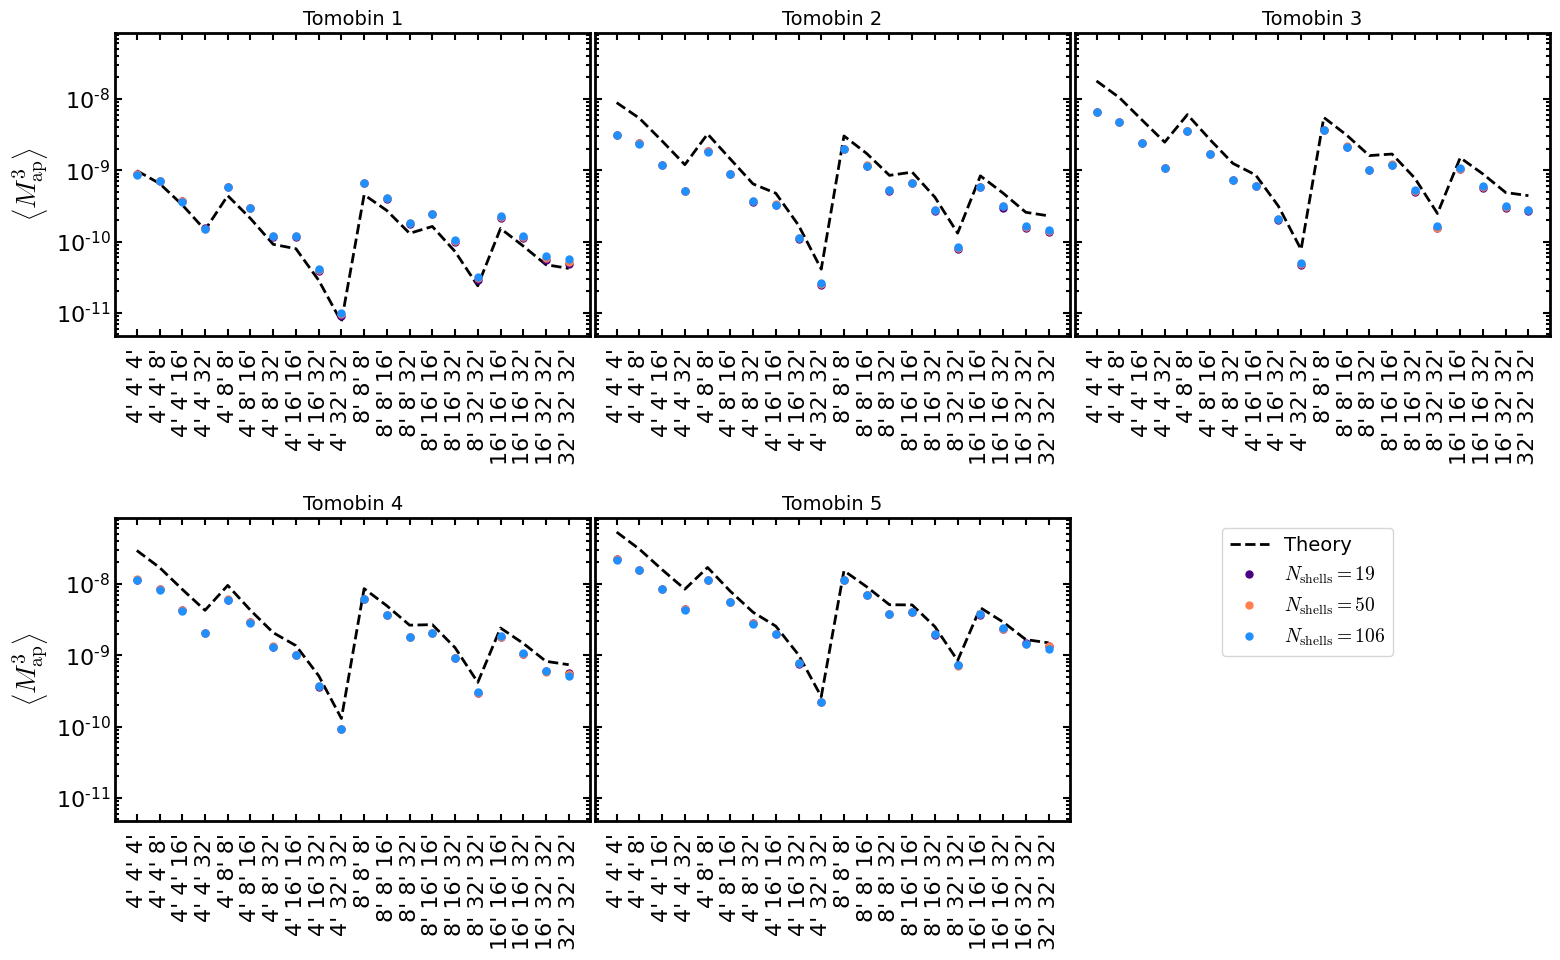

In [69]:
f,ax = plt.subplots(2,3,figsize=(16,10),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>$')
ax[ax_d['3']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>$')
for i in range(5):
    l1, = ax[ax_d['%d'%i]].plot(np.arange(20),map3_theory[i][:,3],'k--',lw=2)
    l2, = ax[ax_d['%d'%i]].plot(np.arange(20),-10*map3_nzshells26_seed0[i],c='indigo',ms=10,marker='.',ls=' ')
    l3, = ax[ax_d['%d'%i]].plot(np.arange(20),-10*map3_nzshells34_seed0[i],c='coral',ms=10,marker='.',ls=' ')
    l4, = ax[ax_d['%d'%i]].plot(np.arange(20),-10*map3_nzshells101_seed0[i],c='dodgerblue',ms=10,marker='.',ls=' ')
    ax[ax_d['%d'%i]].set_xticks(np.arange(20))
    ax[ax_d['%d'%i]].set_xticklabels(theta_format, minor=False, rotation=90)
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
f.delaxes(ax[1,2])    
a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
ax[0,0].set_yscale('log')
#ax[0].set_xscale('log')
#ax[0,0].set_ylim(0.5,1.5)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()
#plt.savefig('imgs/DESC_meeting/map3_Nshells_19_50_106.pdf',bbox_inches='tight')

## PDF

In [77]:
PDF_path_nzshells26_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/PDF/smoothed_theta3_kappa_nzshells26_seed0_*'))
PDF_path_nzshells26_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/PDF/smoothed_theta3_kappa_nzshells26_seed1_*'))
PDF_path_nzshells34_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/PDF/smoothed_theta3_kappa_nzshells34_seed0_*'))
PDF_path_nzshells34_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/PDF/smoothed_theta3_kappa_nzshells34_seed1_*'))
#map2_path_nzshells51_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells51_seed0_*'))
#map2_path_nzshells51_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/map2/kappa_nzshells51_seed1_*'))
PDF_path_nzshells101_seed0 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/PDF/smoothed_theta3_kappa_nzshells101_seed0_*'))
PDF_path_nzshells101_seed1 = np.sort(glob('/pscratch/sd/j/jatorres/data/HOScodes/HACC-Y1/PDF/smoothed_theta3_kappa_nzshells101_seed1_*'))

PDF_nzshells26_seed0 = load_hos(PDF_path_nzshells26_seed0)
PDF_nzshells26_seed1 = load_hos(PDF_path_nzshells26_seed1)
PDF_nzshells34_seed0 = load_hos(PDF_path_nzshells34_seed0)
#map2_nzshells34_seed1 = load_hos(map2_path_nzshells34_seed1)
#maph_nzshells51_seed0 = load_hos(#)
#maph_nzshells51_seed1 = load_hos(#)
PDF_nzshells101_seed0 = load_hos(PDF_path_nzshells101_seed0)
PDF_nzshells101_seed1 = load_hos(PDF_path_nzshells101_seed1)

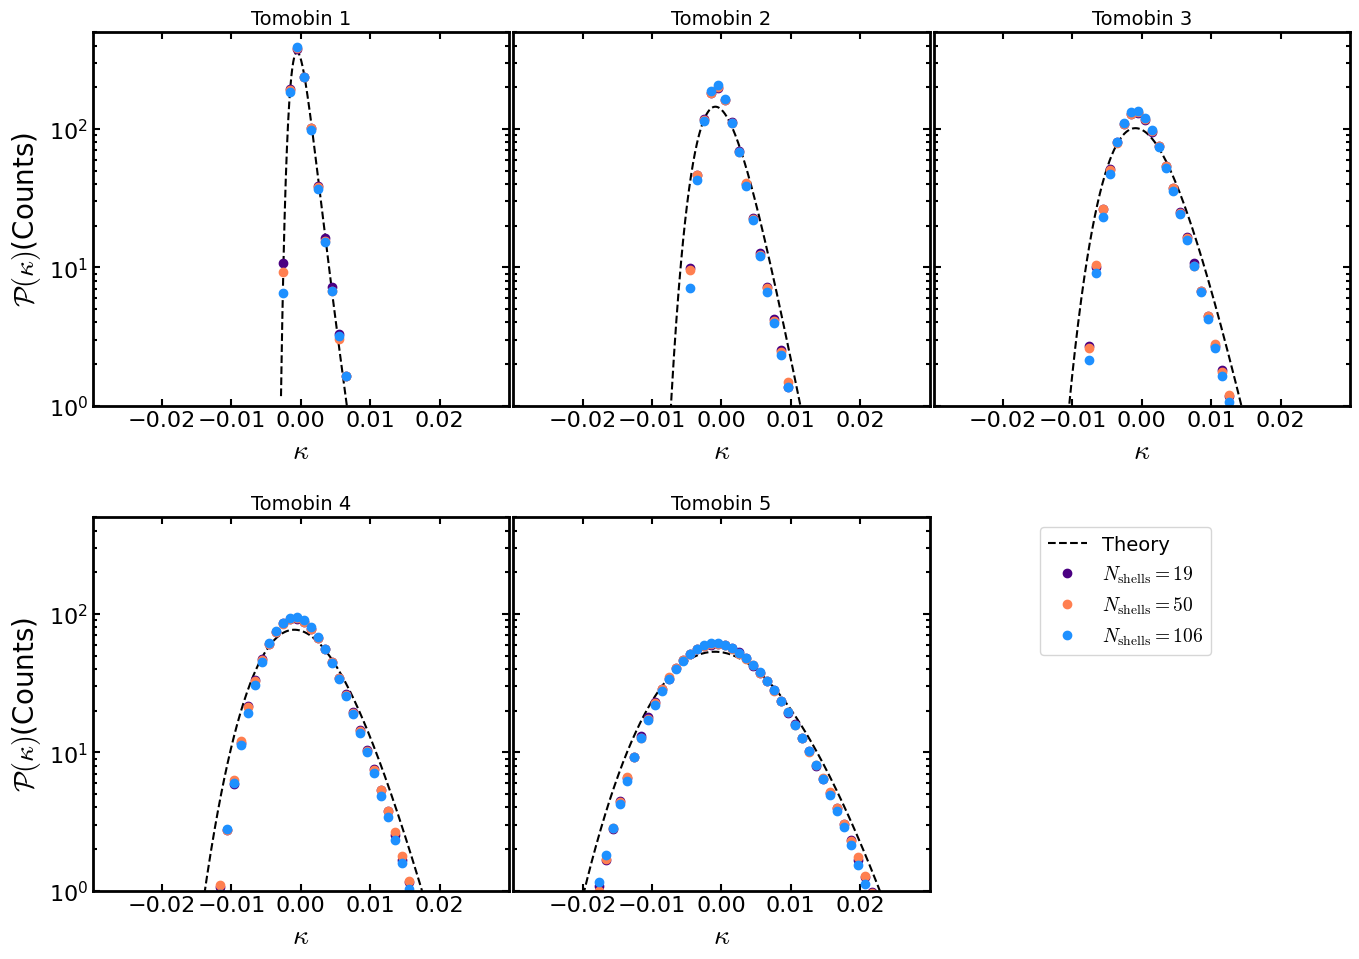

In [81]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)}

f,ax = plt.subplots(2,3,figsize=(14,10),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')
ax[ax_d['3']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')

for i in range(5):
    l1, = ax[ax_d['%d'%i]].plot(PDF_theory[i][:,0],PDF_theory[i][:,1],'k--')
    l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,PDF_nzshells26_seed0[i],color='indigo',marker='o',ls=' ')
    l3, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,PDF_nzshells34_seed0[i],color='coral',marker='o',ls=' ')
    l4, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,PDF_nzshells101_seed0[i],color='dodgerblue',marker='o',ls=' ')
    #
    ax[ax_d['%d'%i]].set_xticks([-0.02,-0.01,0.0,0.01,0.02])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
    ax[ax_d['%d'%i]].set_xlim(-0.03,0.03)
    ax[ax_d['%d'%i]].set_xlabel(r'$\kappa$')
a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
f.delaxes(ax[1,2]) 
ax[0,0].set_yscale('log')
ax[0,0].set_ylim(1e0,5e2)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
#plt.savefig('imgs/DESC_meeting/PDF_Nshells_19_50_106.pdf',bbox_inches='tight')
plt.show()